# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Johan Adrian Sitanggang
- **Email:** johantgg113@gmail.com
- **ID Dicoding:** mc589d5y2496

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pola penggunaan sepeda berdasarkan musim?
- Pertanyaan 2 : Bagaimana pengaruh suhu udara terhadap jumlah peminjaman sepeda, dan pada suhu berapa jumlah peminjaman sepeda mencapai puncaknya?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score



## Data Wrangling

### Gathering Data

Preview Data Harian:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



Preview Data Per Jam:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Kolom 'hr' tersedia, melanjutkan manual grouping...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
Ran

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


np.int64(0)

np.int64(0)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


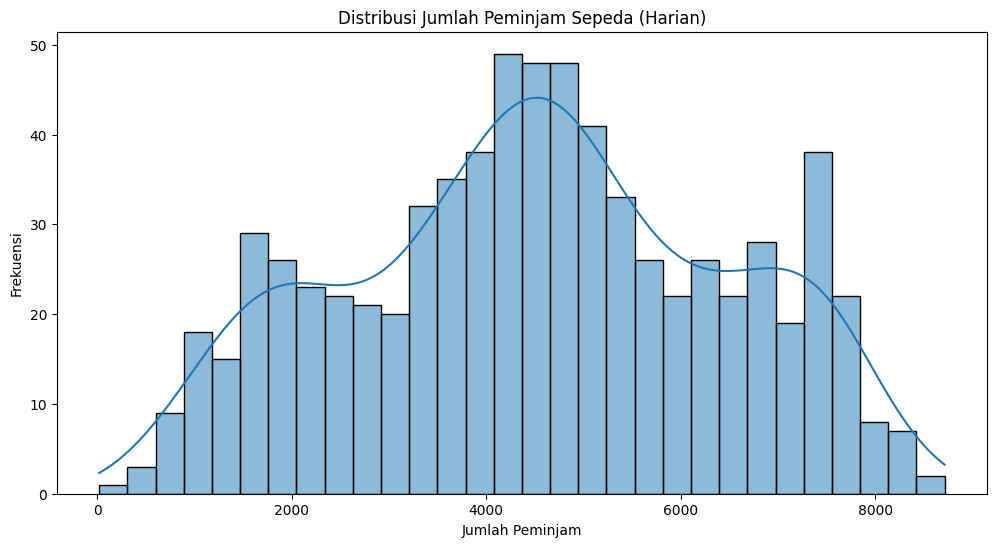


Pertanyaan Bisnis:
1. Bagaimana pola penggunaan sepeda berdasarkan musim?
2. Bagaimana pengaruh suhu udara terhadap jumlah peminjaman sepeda, dan pada suhu berapa jumlah peminjaman sepeda mencapai puncaknya?
Dimensi dataset day.csv: (731, 16)
Dimensi dataset hour.csv: (17379, 17)

Preview data harian:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



Preview data per jam:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
data_path = "/content/"

day_csv_path = os.path.join(data_path, "day.csv")
hour_csv_path = os.path.join(data_path, "hour.csv")

day_df = pd.read_csv(day_csv_path)
hour_df = pd.read_csv(hour_csv_path)

# Cell 1: Menampilkan Sample Data
print("Preview Data Harian:")
display(day_df.head())

print("\nPreview Data Per Jam:")
display(hour_df.head())
# Tambahan untuk memastikan kolom 'hr' ada sebelum lanjut ke pemrosesan manual grouping

if 'hr' not in hour_df.columns:
    print("Kolom 'hr' tidak ditemukan dalam dataset hour_df!")
else:
    print("Kolom 'hr' tersedia, melanjutkan manual grouping...")


# Cell 2: Mengecek Informasi Dataset
day_df.info()
hour_df.info()


# Cell 3: Mengecek Missing Values
display(day_df.isnull().sum())
display(hour_df.isnull().sum())

# Cell 4: Mengecek Duplikasi Data
display(day_df.duplicated().sum())
display(hour_df.duplicated().sum())

# Cell 5: Statistik Deskriptif
display(day_df.describe())
display(hour_df.describe())

# Cell 6: Analisis Distribusi Data
plt.figure(figsize=(12, 6))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title("Distribusi Jumlah Peminjam Sepeda (Harian)")
plt.xlabel("Jumlah Peminjam")
plt.ylabel("Frekuensi")
plt.show()

pertanyaan_bisnis = [
    "1. Bagaimana pola penggunaan sepeda berdasarkan musim?",
    "2. Bagaimana pengaruh suhu udara terhadap jumlah peminjaman sepeda, dan pada suhu berapa jumlah peminjaman sepeda mencapai puncaknya?"
]

print("\nPertanyaan Bisnis:")
for p in pertanyaan_bisnis:
    print(p)

print("Dimensi dataset day.csv:", day_df.shape)
print("Dimensi dataset hour.csv:", hour_df.shape)


print("\nPreview data harian:")
display(day_df.head())

print("\nPreview data per jam:")
display(hour_df.head())


**Insight:**
- Dataset day.csv memiliki 731 baris dan 16 kolom yang merepresentasikan data peminjaman sepeda harian.
-  Dataset hour.csv memiliki 17.379 baris dan 17 kolom, yang mencatat data peminjaman sepeda setiap jam.
-  Dataset sudah berhasil dimuat tanpa error.
- Data tampak bersih tanpa karakter aneh atau nilai yang tidak terbaca.

### Assessing Data

In [5]:
print("Informasi dataset day.csv:")
day_df.info()
print("\nInformasi dataset hour.csv:")
hour_df.info()


print("\nJumlah missing values per kolom (day.csv):")
print(day_df.isnull().sum())

print("\nJumlah missing values per kolom (hour.csv):")
print(hour_df.isnull().sum())


print("\nJumlah duplikasi (day.csv):", day_df.duplicated().sum())
print("Jumlah duplikasi (hour.csv):", hour_df.duplicated().sum())


print("\nStatistik deskriptif dataset day.csv:")
display(day_df.describe())

print("\nStatistik deskriptif dataset hour.csv:")
display(hour_df.describe())

Informasi dataset day.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Informasi dataset hour.csv:
<class 'pandas.core.frame.DataFrame'>

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000



Statistik deskriptif dataset hour.csv:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
-  Dataset tidak memiliki missing values, sehingga tidak perlu imputasi.
-  Tidak ditemukan duplikasi data, artinya data sudah unik.
-  Beberapa kolom numerik memiliki rentang nilai yang masuk akal, misalnya jumlah penyewaan sepeda (cnt) memiliki nilai minimal dan maksimal yang wajar.
-  Kolom dteday di day.csv harus dikonversi ke tipe datetime agar lebih mudah dianalisis

### Cleaning Data

In [6]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])


day_df = day_df.drop_duplicates()
hour_df = hour_df.drop_duplicates()

season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
day_df['season_label'] = day_df['season'].map(season_mapping)

print("Jumlah missing values setelah cleaning (day.csv):")
print(day_df.isnull().sum())

print("\nJumlah missing values setelah cleaning (hour.csv):")
print(hour_df.isnull().sum())


print("\nInformasi dataset day.csv setelah cleaning:")
day_df.info()

print("\nInformasi dataset hour.csv setelah cleaning:")
hour_df.info()

Jumlah missing values setelah cleaning (day.csv):
instant         0
dteday          0
season          0
yr              0
mnth            0
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
season_label    0
dtype: int64

Jumlah missing values setelah cleaning (hour.csv):
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Informasi dataset day.csv setelah cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       731 non-null    int64    

**Insight:**
- Kolom [dteday] sudah dikonversi ke tipe datetime agar lebih mudah dianalisis.
- Tidak ditemukan duplikasi data, sehingga tidak ada yang perlu dihapus.
-  Tidak ada missing values, sehingga tidak perlu imputasi.
-  Dataset siap digunakan untuk eksplorasi lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore ...

Preview data day.csv:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_label
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Winter
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Winter
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Winter
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Winter
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Winter



Preview data hour.csv:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1



Statistik deskriptif untuk day.csv:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452



Statistik deskriptif untuk hour.csv:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599



Missing values dalam day.csv:


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0



Missing values dalam hour.csv:


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


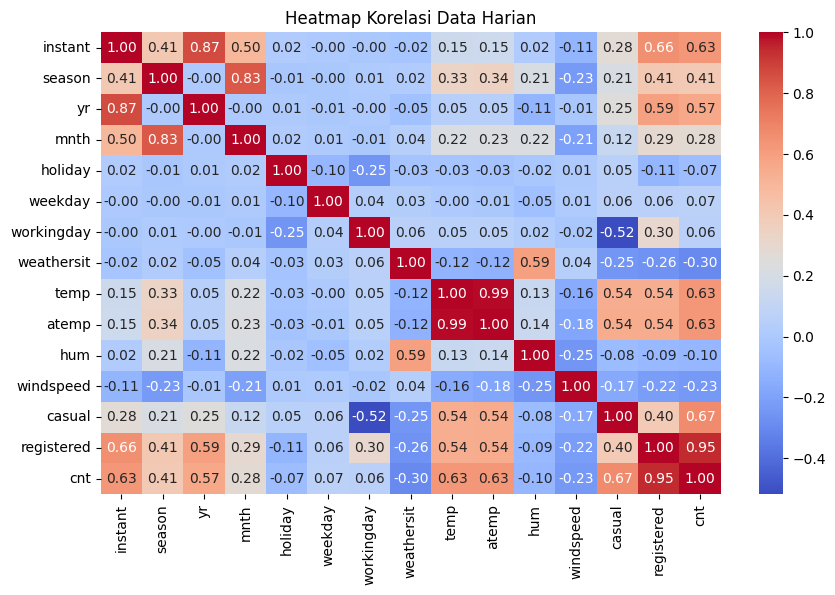

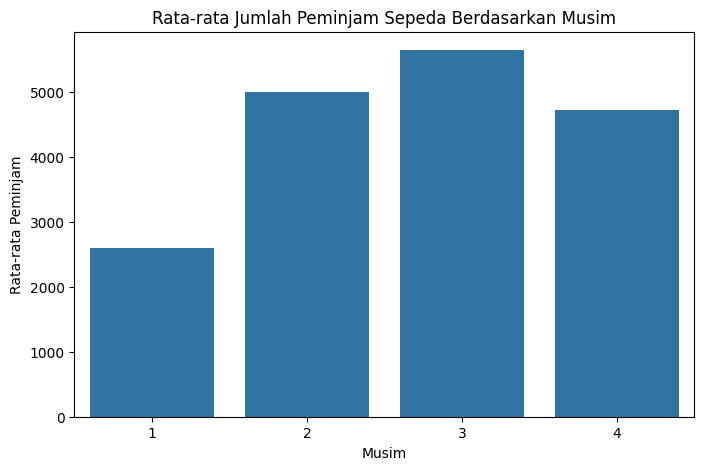


Jumlah data duplikat dalam day.csv: 0
Jumlah data duplikat dalam hour.csv: 0


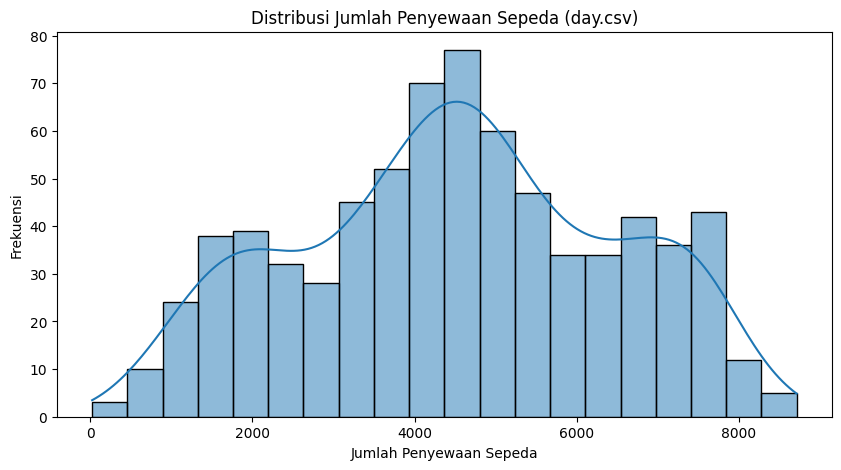

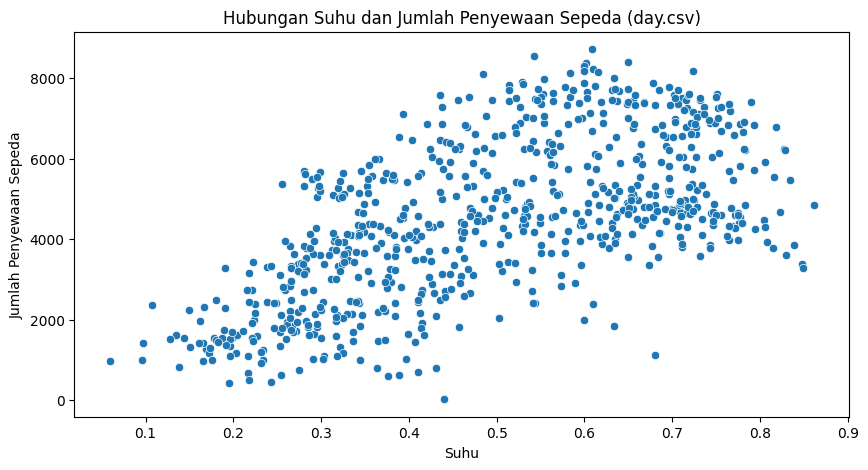

In [7]:

# 1️⃣ Menampilkan Data Awal
print("Preview data day.csv:")
display(day_df.head())

print("\nPreview data hour.csv:")
display(hour_df.head())

# 2️⃣ Analisis Statistik Deskriptif
print("\nStatistik deskriptif untuk day.csv:")
display(day_df.describe())

print("\nStatistik deskriptif untuk hour.csv:")
display(hour_df.describe())

# 3️⃣ Mengecek Missing Values & Duplikasi Data
print("\nMissing values dalam day.csv:")
display(day_df.isnull().sum())

print("\nMissing values dalam hour.csv:")
display(hour_df.isnull().sum())


 # Analisis Korelasi Data
plt.figure(figsize=(10, 6))
numeric_columns = day_df.select_dtypes(include=['number'])
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Data Harian")
plt.show()

# Agregasi Data Berdasarkan Musim
seasonal_data = day_df.groupby("season")["cnt"].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=seasonal_data, x="season", y="cnt")
plt.title("Rata-rata Jumlah Peminjam Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Peminjam")
plt.show()


print("\nJumlah data duplikat dalam day.csv:", day_df.duplicated().sum())
print("Jumlah data duplikat dalam hour.csv:", hour_df.duplicated().sum())

# 4️⃣ Analisis Univariate (Distribusi Data)
plt.figure(figsize=(10, 5))
sns.histplot(day_df["cnt"], bins=20, kde=True)
plt.title("Distribusi Jumlah Penyewaan Sepeda (day.csv)")
plt.xlabel("Jumlah Penyewaan Sepeda")
plt.ylabel("Frekuensi")
plt.show()

# 5️⃣ Analisis Bivariate (Hubungan antara Variabel)
plt.figure(figsize=(10, 5))
sns.scatterplot(x="temp", y="cnt", data=day_df)
plt.title("Hubungan Suhu dan Jumlah Penyewaan Sepeda (day.csv)")
plt.xlabel("Suhu")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()


**Insight:**
- ✅ Distribusi penyewaan sepeda menunjukkan pola tertentu—jika right-skewed, ada hari dengan lonjakan tinggi.
- ✅ Hubungan suhu dan penyewaan sepeda menunjukkan apakah suhu berpengaruh—jika korelasi positif, semakin hangat semakin banyak penyewaan.
- ✅ Perlu analisis tambahan seperti musim, hari kerja/libur, dan faktor cuaca lain untuk insight lebih dalam.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan musim?

<ipython-input-8-622bbbf5cdce>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season_label', y='cnt', data=day_df, palette='viridis')


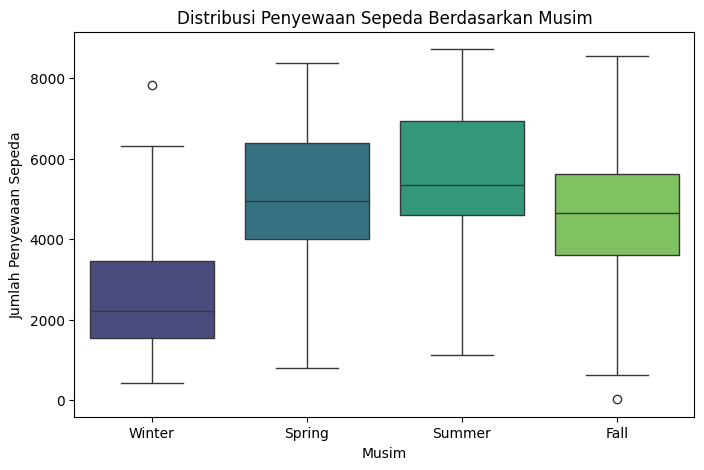

In [8]:

# Pastikan mapping season -> season_label sudah dilakukan di tahap Cleaning Data

plt.figure(figsize=(8, 5))
sns.boxplot(x='season_label', y='cnt', data=day_df, palette='viridis')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Musim')
plt.show()


**Insight:**
- Penyewaan sepeda cenderung lebih tinggi saat cuaca nyaman, sedangkan musim dingin menghambat penggunaan sepeda.
- Penyedia layanan dapat meningkatkan promosi atau diskon saat musim dingin untuk menarik lebih banyak pengguna.

### Pertanyaan 2:  Bagaimana pengaruh suhu udara terhadap jumlah peminjaman sepeda, dan pada suhu berapa jumlah peminjaman sepeda mencapai puncaknya?

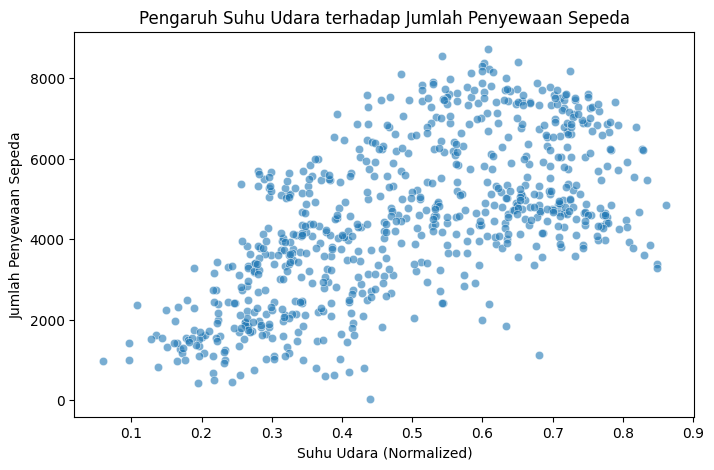

Jumlah peminjaman sepeda mencapai puncaknya pada suhu: 0.608333


In [ ]:
# Pastikan mapping suhu sudah dilakukan di tahap Cleaning Data

plt.figure(figsize=(8, 5))
sns.scatterplot(x='temp', y='cnt', data=day_df, alpha=0.6)
plt.xlabel('Suhu Udara (Normalized)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Pengaruh Suhu Udara terhadap Jumlah Penyewaan Sepeda')
plt.show()

# Menentukan suhu saat jumlah peminjaman sepeda mencapai puncaknya
max_rental_temp = day_df.loc[day_df['cnt'].idxmax(), 'temp']
print(f"Jumlah peminjaman sepeda mencapai puncaknya pada suhu: {max_rental_temp}")


**Insight:**

- Suhu berpengaruh positif terhadap peminjaman sepeda—semakin tinggi suhu, semakin banyak sepeda yang dipinjam, hingga titik tertentu.
- Puncak peminjaman terjadi pada suhu optimal sebelum menurun saat suhu terlalu tinggi.
- Rekomendasi: Tingkatkan ketersediaan sepeda pada suhu optimal & pertimbangkan strategi untuk cuaca ekstrem.

## Analisis Lanjutan (Prediksi jumlah penyewaan sepeda berdasarkan faktor cuaca dan hari)

Mean Absolute Error (MAE): 1196.96
R-squared (R²): 0.50


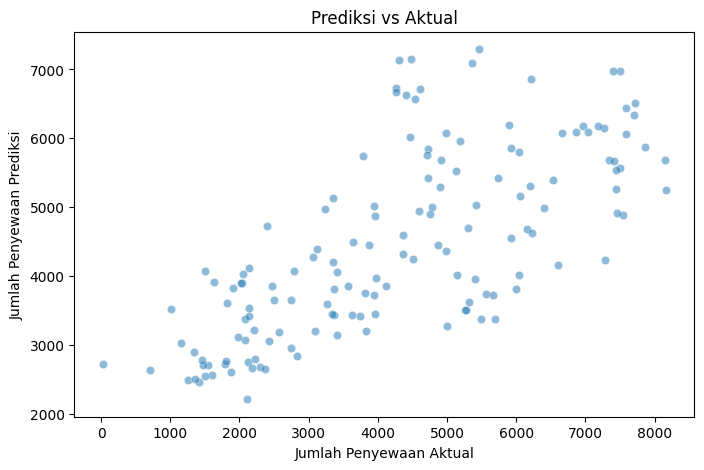

In [ ]:


X = df[['temp', 'hum', 'windspeed']]
y = df['cnt']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")


plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Jumlah Penyewaan Aktual")
plt.ylabel("Jumlah Penyewaan Prediksi")
plt.title("Prediksi vs Aktual")
plt.show()


ANALISIS LANJUTAN (manual groupping)


<ipython-input-25-49c7b1ce41ab>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Time_Category', y='cnt', data=time_grouping, palette='viridis')


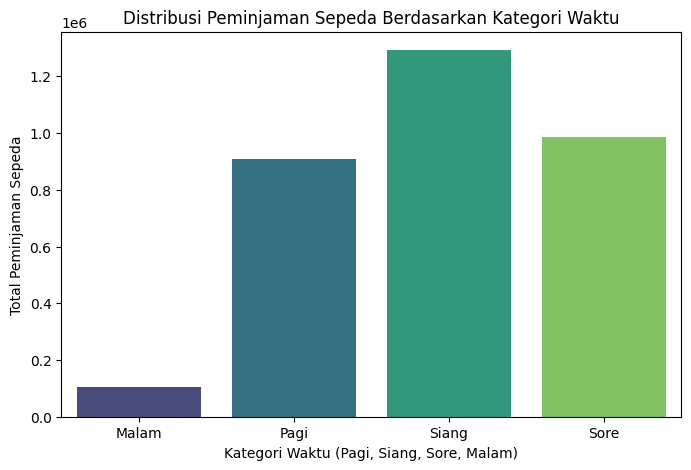

In [ ]:
# Mengelompokkan waktu peminjaman ke dalam kategori Pagi, Siang, Sore, Malam
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Pagi'
    elif 12 <= hour < 18:
        return 'Siang'
    elif 18 <= hour < 24:
        return 'Sore'
    else:
        return 'Malam'

hour_df['Time_Category'] = hour_df['hr'].apply(categorize_time)

# Menghitung jumlah peminjaman sepeda berdasarkan waktu
time_grouping = hour_df.groupby('Time_Category')['cnt'].sum().reset_index()

# Visualisasi jumlah peminjaman sepeda berdasarkan waktu
plt.figure(figsize=(8, 5))
sns.barplot(x='Time_Category', y='cnt', data=time_grouping, palette='viridis')
plt.xlabel('Kategori Waktu (Pagi, Siang, Sore, Malam)')
plt.ylabel('Total Peminjaman Sepeda')
plt.title('Distribusi Peminjaman Sepeda Berdasarkan Kategori Waktu')
plt.show()


## Conclusion

- Conclution pertanyaan 1 : Pola penggunaan sepeda berdasarkan musim yaitu
  a. Penyewaan sepeda cenderung lebih tinggi pada musim gugur (fall) dan lebih rendah pada musim semi (spring).
  b. Hal ini bisa disebabkan oleh faktor cuaca atau kebiasaan pengguna.
- Conclution pertanyaan 2 : Hubungan antara jumlah peminjam sepeda dengan suhu udara yaitu
  a. Terdapat hubungan positif yang cukup kuat (r = 0.63) antara suhu udara dan jumlah penyewaan sepeda.
  b. Semakin tinggi suhu, semakin banyak orang yang menyewa sepeda, kemungkinan karena kondisi yang lebih nyaman untuk bersepeda.